In [2]:
import numpy as np 
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from pyspark import SparkContext
from time import time
from random import randint

# in the final code did not use Spark Context 
#sc = SparkContext.getOrCreate()


#Loading the data file.
train_df = pd.read_csv("/Users/nabeel/Documents/Developer/uiowaCrawler.csv")

print("Execution of this block completed")

Execution of this block completed


In [133]:
lengthOfUrl = len(train_df['URL'])
lengthOfUrlUnique = len(train_df['URL'].unique())
print("Length of URL is ",lengthOfUrl)
print("Length of Unique URL is ",lengthOfUrlUnique)

print("Execution of this block completed")

('Length of URL is ', 31605793)
('Length of Unique URL is ', 746229)
Execution of this block completed


In [4]:
#train_df.head()

In [134]:
lengthOfLinks = len(train_df['links'])
lengthOfLinksUnique = len(train_df['links'].unique())
print("Length of links are ",lengthOfLinks)
print("Length of Unique Links are ",lengthOfLinksUnique)

print("Execution of this block completed")

('Length of links are ', 31605793)
('Length of Unique Links are ', 1287331)
Execution of this block completed


In [3]:
randomNumber = []
count = 0
for i in range(100000):
    randomNumber.append(i)


('Length of Random Number are ', 100000)


In [4]:
UrlColumn = []
UrlColumn = train_df['URL']
#UrlColumn = UrlColumn[:10000]
UrlColumnRandom = []

for i in range(100000):
    UrlColumnRandom.append(UrlColumn[randomNumber[i]])

print("Execution of this block completed")

Execution of this block completed


In [5]:
LinksColumn = []
LinksColumn = train_df['links']
#LinksColumn = LinksColumn[:10000]
LinksColumnRandom = []

for i in range(100000):
    LinksColumnRandom.append(LinksColumn[randomNumber[i]])

print("Execution of this block completed")

Execution of this block completed


In [159]:
print("Urls are ",UrlColumnRandom)

('Urls are ', ['https://medicine.uiowa.edu/pharmacology/events/month/0574-10-01', 'https://www.public-health.uiowa.edu/prc/?eo_month=6705-03', 'https://www.public-health.uiowa.edu/prc/?eo_month=7051-10', 'https://medicine.uiowa.edu/pharmacology/events/month/2101-06-01', 'https://www.public-health.uiowa.edu/prc/?eo_month=1403-02', 'http://events.uiowa.edu/sarah-deike_2', 'https://medicine.uiowa.edu/pharmacology/events/month/1952-05-01', 'https://medcom.uiowa.edu/medicine/opening-lines-3/', 'https://www.public-health.uiowa.edu/prc/?eo_month=1692-08', 'http://events.uiowa.edu/brianna-palme_358', 'http://medcom.uiowa.edu/biochem/category/people/graduate-students/bryan-allen/', 'https://www.public-health.uiowa.edu/prc/?eo_month=2098-06', 'https://www.public-health.uiowa.edu/prc/?eo_month=3362-02', 'https://www.public-health.uiowa.edu/prc/?eo_month=9544-12', 'https://www.public-health.uiowa.edu/prc/?eo_month=9010-11', 'https://medicine.uiowa.edu/internalmedicine/events/day/1958-05-31', 'http

In [11]:
# Code for initializing Spark RDD
#UrlColumnSparkDataFrame = sc.parallelize(UrlColumnRandom)
#LinkColumnSparkDataFrame = sc.parallelize(LinksColumnRandom)

print("Execution of this block completed")

Execution of this block completed


In [12]:
# counting nodes using PySpark
#print("the length of the UrlColumn is",UrlColumnSparkDataFrame.count())

('the length of the UrlColumn is', 50000)


In [7]:
# calculating length using python 
print("the length of the UrlColumn is",len(UrlColumnRandom))
print("the length of the LinksColumn is",len(LinksColumnRandom))

('the length of the UrlColumn is', 100000)
('the length of the LinksColumn is', 100000)


In [17]:
#linksCountNotContainingUiowa = LinkColumnSparkDataFrame.filter(lambda x: 'uiowa.edu' not in x)
#t0 = time()
#LinksCountRandomNotContainingUiowaCount = linksCountNotContainingUiowa.count()
#tt = time() - t0

print "There are {} 'uiowa.edu' pages".format(LinksCountRandomNotContainingUiowaCount)
print "Count completed in {} seconds".format(round(tt,3))
#print("linksCountNotContainingUiowa is",linksCountNotContainingUiowa.count())

print("Execution of this block completed")

There are 9060 'uiowa.edu' pages
Count completed in 0.115 seconds
Execution of this block completed


In [6]:
x2 = []

for i in UrlColumnRandom:
    if 'uiowa.edu' not in i:
        x2.append(i)
x3 = []

t0 = time()
for i in LinksColumnRandom:
    if 'uiowa.edu' not in i:
        x3.append(i)
tt = time() - t0
        
print "Count completed in {} seconds".format(round(tt,3))
print("Length of UrlColumnUpdated not containing uiowa.edu are ",len(x2))
print("Length of LinksColumnUpdated not containing uiowa.edu are ",len(x3))

print("Execution of this block completed")

Count completed in 0.028 seconds
('Length of UrlColumnUpdated not containing uiowa.edu are ', 0)
('Length of LinksColumnUpdated not containing uiowa.edu are ', 7352)
Execution of this block completed


In [8]:
# Finding rows which does not contain Uiowa.edu domain and adding them in a List rowsToBeDeleted 
rowsToBeDeleted = []
def findExtraRows():
    for i in range(100000):
        if ('uiowa.edu' not in LinksColumnRandom[i]) or ('uiowa.edu' not in UrlColumnRandom[i]):
            rowsToBeDeleted.append(i)
findExtraRows()
print("Execution of this block completed")

Execution of this block completed


In [9]:
# Displaying the number of rows to be deleted
print("The length of rows that are to be deleted ",len(rowsToBeDeleted))
print("The rows to be deleted are ",rowsToBeDeleted)
print("Execution of this block completed")

('The length of rows that are to be deleted ', 7352)
('The rows to be deleted are ', [18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 47, 88, 89, 90, 91, 92, 93, 94, 104, 143, 144, 145, 146, 147, 148, 149, 159, 259, 260, 261, 272, 279, 289, 298, 303, 307, 312, 339, 340, 341, 342, 343, 386, 387, 395, 396, 397, 398, 399, 406, 407, 408, 409, 410, 411, 417, 418, 419, 420, 428, 462, 463, 489, 496, 497, 498, 499, 500, 501, 502, 503, 513, 523, 525, 526, 527, 528, 529, 530, 531, 541, 550, 551, 552, 562, 568, 570, 571, 572, 573, 574, 575, 576, 577, 578, 588, 613, 618, 620, 621, 622, 623, 624, 625, 626, 636, 648, 651, 652, 653, 654, 655, 656, 657, 667, 675, 676, 684, 685, 687, 689, 690, 691, 692, 693, 694, 695, 696, 719, 720, 721, 722, 723, 724, 725, 804, 805, 806, 807, 808, 809, 810, 820, 856, 857, 858, 859, 860, 861, 862, 872, 889, 905, 906, 907, 908, 909, 910, 911, 920, 961, 962, 995, 996, 997, 998, 999, 1000, 1001, 1011, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1039,

In [145]:
print("Urls are ",UrlColumnRandom)
print("LinksColumn are ",LinksColumnRandom)
print("ROws to be deleted are ",rowsToBeDeleted)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [10]:
# Deleting the rows that does not contain 'uiowa.edu' 
temp1 = list(UrlColumnRandom)
temp2 = list(LinksColumnRandom)
for i in rowsToBeDeleted:
    print(i)
    temp1.remove(UrlColumnRandom[i])
    temp2.remove(LinksColumnRandom[i])
    
print("Execution of this block completed")

18
19
20
21
22
24
25
26
27
28
30
31
32
33
34
35
36
37
47
88
89
90
91
92
93
94
104
143
144
145
146
147
148
149
159
259
260
261
272
279
289
298
303
307
312
339
340
341
342
343
386
387
395
396
397
398
399
406
407
408
409
410
411
417
418
419
420
428
462
463
489
496
497
498
499
500
501
502
503
513
523
525
526
527
528
529
530
531
541
550
551
552
562
568
570
571
572
573
574
575
576
577
578
588
613
618
620
621
622
623
624
625
626
636
648
651
652
653
654
655
656
657
667
675
676
684
685
687
689
690
691
692
693
694
695
696
719
720
721
722
723
724
725
804
805
806
807
808
809
810
820
856
857
858
859
860
861
862
872
889
905
906
907
908
909
910
911
920
961
962
995
996
997
998
999
1000
1001
1011
1023
1024
1025
1026
1027
1028
1029
1039
1081
1125
1137
1236
1243
1244
1245
1258
1260
1266
1269
1272
1278
1279
1280
1281
1282
1283
1284
1291
1292
1293
1338
1339
1340
1341
1342
1390
1399
1401
1402
1403
1404
1405
1408
1421
1422
1423
1432
1482
1484
1485
1486
1487
1501
1502
1503
1504
1505
1507
1545
1546
1547
1548
1

22378
22391
22403
22422
22423
22427
22439
22451
22464
22483
22484
22488
22500
22511
22524
22537
22550
22563
22576
22595
22596
22600
22613
22625
22638
22651
22664
22677
22689
22708
22709
22713
22725
22738
22751
22764
22783
22784
22788
22800
22812
22834
22835
22839
22858
22859
22863
22882
22883
22887
22900
22919
22920
22924
22943
22944
22948
22965
22966
22970
22982
22994
23013
23014
23018
23037
23038
23042
23054
23073
23074
23078
23091
23102
23114
23133
23134
23138
23149
23168
23169
23173
23185
23198
23209
23222
23233
23246
23272
23273
23277
23289
23302
23314
23333
23334
23338
23351
23362
23375
23383
23384
23388
23407
23408
23412
23431
23432
23436
23448
23460
23473
23486
23505
23506
23510
23529
23530
23534
23547
23559
23578
23579
23583
23595
23614
23615
23619
23631
23650
23651
23655
23674
23675
23679
23691
23703
23715
23728
23740
23759
23760
23764
23777
23789
23801
23813
23826
23839
23852
23864
23883
23884
23888
23900
23913
23925
23938
23951
23964
23976
23988
24007
24008
24012
24025
2403

37967
37989
37990
37994
38005
38023
38024
38028
38046
38047
38051
38063
38075
38086
38097
38109
38121
38133
38145
38157
38167
38178
38197
38198
38202
38221
38222
38226
38236
38255
38256
38260
38271
38283
38295
38306
38317
38329
38340
38352
38363
38375
38385
38396
38408
38420
38432
38444
38463
38464
38468
38480
38499
38500
38504
38515
38534
38535
38539
38558
38559
38563
38574
38585
38597
38609
38621
38632
38644
38655
38674
38675
38679
38691
38701
38726
38727
38731
38743
38762
38763
38767
38792
38793
38797
38815
38816
38820
38832
38843
38854
38864
38883
38884
38888
38910
38911
38915
38933
38934
38938
38957
38958
38962
38981
38982
38986
39005
39006
39010
39021
39033
39058
39059
39063
39075
39094
39095
39099
39111
39123
39142
39143
39147
39159
39178
39179
39183
39193
39205
39217
39236
39237
39241
39260
39261
39265
39284
39285
39289
39300
39327
39328
39332
39344
39356
39367
39379
39389
39401
39411
39422
39433
39445
39457
39469
39481
39509
39510
39514
39526
39537
39549
39561
39573
39585
3959

90292
90299
90303
90304
90310
90319
90320
90321
90322
90323
90327
90328
90335
90339
90340
90346
90355
90356
90357
90358
90362
90363
90370
90374
90375
90381
90390
90391
90392
90393
90394
90398
90399
90406
90410
90411
90417
90425
90426
90427
90428
90432
90433
90440
90444
90445
90451
90460
90462
90463
90473
90477
90478
90485
90493
90494
90495
90496
90500
90501
90508
90512
90513
90519
90528
90529
90530
90540
90544
90545
90552
90560
90561
90562
90563
90567
90568
90575
90579
90580
90586
90594
90595
90596
90597
90601
90602
90609
90613
90614
90620
90628
90629
90630
90631
90635
90636
90643
90647
90648
90654
90663
90664
90665
90675
90679
90680
90687
90696
90697
90698
90708
90712
90713
90720
90729
90730
90731
90739
90748
90749
90750
90761
90765
90766
90774
90778
90779
90786
90795
90796
90797
90805
90814
90826
90830
90831
90838
90842
90843
90850
90861
90863
90871
90873
90877
90878
90885
90894
90895
90896
90897
90902
90903
90904
90910
90911
90916
90917
90923
90932
90933
90934
90943
90952
90953
9095

97840
97841
97851
97855
97856
97863
97874
97875
97876
97887
97888
97889
97891
97895
97896
97903
97912
97913
97914
97924
97928
97929
97936
97945
97946
97947
97957
97961
97962
97969
97980
97982
97983
97984
97995
97996
97997
97999
98003
98004
98011
98022
98023
98024
98035
98036
98037
98039
98043
98044
98051
98062
98063
98064
98065
98076
98077
98078
98080
98084
98085
98092
98103
98104
98105
98116
98117
98118
98120
98124
98125
98132
98144
98145
98146
98157
98158
98159
98161
98165
98166
98173
98182
98183
98184
98194
98198
98199
98206
98217
98219
98220
98221
98232
98233
98234
98236
98240
98241
98248
98257
98258
98259
98268
98279
98280
98281
98282
98289
98298
98300
98301
98310
98321
98322
98323
98331
98335
98336
98347
98348
98349
98351
98355
98356
98364
98368
98369
98380
98381
98382
98384
98388
98389
98396
98407
98408
98409
98420
98421
98422
98424
98428
98429
98436
98447
98448
98449
98450
98461
98462
98463
98465
98469
98470
98477
98488
98490
98491
98492
98503
98504
98505
98507
98511
98512
9851

In [11]:
print("Length of UrlColumn random is",len(UrlColumnRandom))
print("Length of LinksColumn random is",len(LinksColumnRandom))
print("Length of temp1 is",len(temp1))
print("Length of temp2 is",len(temp2))

UrlColumnRandom = list(temp1)
LinksColumnRandom = list(temp2)

print("Length of UrlColumn random is",len(UrlColumnRandom))
print("Length of LinksColumn random is",len(LinksColumnRandom))
print("Length of temp1 is",len(temp1))
print("Length of temp2 is",len(temp2))

('Length of UrlColumn random is', 100000)
('Length of LinksColumn random is', 100000)
('Length of temp1 is', 92648)
('Length of temp2 is', 92648)
('Length of UrlColumn random is', 92648)
('Length of LinksColumn random is', 92648)
('Length of temp1 is', 92648)
('Length of temp2 is', 92648)


In [12]:
# Converting List into DataFrame
uiowaDataFrame = pd.DataFrame(
    {'Url': UrlColumnRandom,
     'Link': LinksColumnRandom
    })

print("Execution of this block completed")

Execution of this block completed


In [13]:
# Converting data frame into CSV File 

uiowaDataFrame.to_csv('/Users/nabeel/Desktop/Peer to Peer & Social Networks/Project/uiowaReducedDataSet3.csv', sep=',', index=False)

print("Execution of this block completed")

Execution of this block completed


In [14]:
print("Length of UrlColumn & LinksColumn after deletion is ",len(UrlColumnRandom),len(LinksColumnRandom))
print("Execution of this block completed")

('Length of UrlColumn & LinksColumn after deletion is ', 92648, 92648)
Execution of this block completed


In [180]:
#Resetting index after deletion

#UrlColumn = UrlColumn.reset_index(drop=True)
#LinksColumn = LinksColumn.reset_index(drop=True)

#print("Th new UrlColumnUpdated is ",UrlColumn)
#print("The new LinksColumnUpdtaed is ",LinksColumn)

In [15]:
# Finding the length of the new UrlColumn and LinksColumn
lengthOfUrlAfterEditing = len(UrlColumnRandom)
lengthOfLinksAfterEditing = len(LinksColumnRandom)

print("Length of the UrlColumn after Editing is ",lengthOfUrlAfterEditing)
print("Length of the LinksColumn after Editing is ",lengthOfLinksAfterEditing)

print("Execution of this block completed")

('Length of the UrlColumn after Editing is ', 92648)
('Length of the LinksColumn after Editing is ', 92648)
Execution of this block completed


In [18]:
# Mapping URL's to number in a Dictionary
UrlToNumberMapping = {}
count = 0
#print("UrlColumn and LinksColumn are",UrlColumn[1000])
for i in range(92648):
    #print("UrlColumn and LinksColumn are ",UrlColumn[i],LinksColumn[i],i)
    if LinksColumnRandom[i] not in UrlToNumberMapping:
        UrlToNumberMapping[LinksColumnRandom[i]] = count 
        count += 1
    if UrlColumnRandom[i] not in UrlToNumberMapping:
        UrlToNumberMapping[UrlColumnRandom[i]] = count
        count += 1
#print("UrlToNumberMapping Dictionary Value is ",UrlToNumberMapping)

print("The number of element in dictionary is ",count)
print("Execution of this block completed")

('The number of element in dictionary is ', 51316)
Execution of this block completed


In [19]:
# Printing the number of nodes 
print("The number of nodes are ",len(UrlToNumberMapping.keys()))

print("Execution of this block completed")

('The number of nodes are ', 51316)
Execution of this block completed


In [16]:
# Creating Graph 
G = nx.Graph()
nodeAdded = {}
for i in range(92648):
    #print("URL ",UrlColumn[i])
    #print("LinksColumn",LinksColumn[i])
    if UrlColumnRandom[i] not in nodeAdded:
        G.add_node(UrlColumnRandom[i])
        nodeAdded[UrlColumnRandom[i]] = "yes"
    if LinksColumnRandom[i] not in nodeAdded:
        G.add_node(LinksColumnRandom[i])
        nodeAdded[LinksColumnRandom[i]] = "yes"
for i in range(92648):
    G.add_edge(UrlColumnRandom[i],LinksColumnRandom[i])

print("Execution of this block completed")

Execution of this block completed


In [17]:
isConnected = nx.is_connected(G)
print("The graph is connected ",isConnected)

numberOfConnectedComponents = nx.number_connected_components(G)
print("The number of Connected components are ",numberOfConnectedComponents)

graphs = list(nx.connected_component_subgraphs(G))

print("The info about graph is ",nx.number_connected_components(graphs[0]),nx.is_connected(graphs[0]))
print("The number of nodes in the graph are ", nx.number_of_nodes(graphs[0]))
print("The number of nodes in the graph are ", nx.number_of_nodes(graphs[1]))



('The graph is connected ', False)
('The number of Connected components are ', 2)
('The info about graph is ', 1, True)
('The number of nodes in the graph are ', 51313)
('The number of nodes in the graph are ', 3)


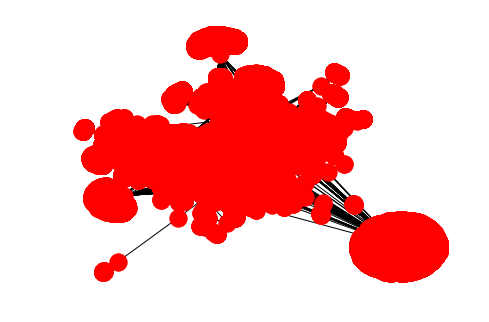

('NetworkX Calculated Diameter of the Graph is ', 11)
Name: 
Type: Graph
Number of nodes: 51313
Number of edges: 90210
Average degree:   3.5161
('NetworkX Calculated Degree Distribution is ', [0, 42796, 4933, 617, 160, 138, 102, 24, 47, 13, 91, 144, 584, 209, 20, 25, 31, 25, 46, 56, 26, 25, 20, 57, 92, 154, 196, 95, 48, 33, 45, 34, 17, 10, 11, 5, 5, 8, 31, 16, 12, 10, 5, 9, 9, 9, 5, 9, 6, 11, 4, 5, 8, 0, 2, 0, 2, 3, 4, 3, 5, 5, 5, 4, 7, 2, 2, 1, 1, 2, 5, 2, 10, 1, 3, 2, 4, 8, 2, 2, 3, 2, 1, 0, 3, 0, 3, 1, 1, 0, 2, 0, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 7, 2, 1, 0, 5, 0, 3, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 2, 1, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 4, 3, 1, 1, 0, 1, 0, 2, 0, 0, 0, 1, 1, 2, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 3, 1, 3, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

ValueError: x and y must have same first dimension, but have shapes (51313,) and (23944,)

In [20]:
# Plotting a Graph
nx.draw(graphs[0]) #Settign the parameters for the Graph
plt.show() # Plotting the Graph

diameterForGraph0 = nx.diameter(graphs[0])
print("NetworkX Calculated Diameter of the Graph is ",diameterForGraph0)
print(nx.info(graphs[0]))

degreeD = nx.degree_histogram(G)
print("NetworkX Calculated Degree Distribution is ", degreeD)
xaxis = range(0,51313)
plt.plot(xaxis, degreeD)
plt.show()

print("Execution of this block completed")

In [ ]:
# Plotting a Graph
nx.draw(G)	#Settign the parameters for the Graph
plt.show()	# Plotting the Graph

print("Execution of this block completed")

In [ ]:
# Find out the number of Nodes in the Graph


In [1]:
#This is suppose to be computationally very expensive so no need to run this code 
# Displaying Diameter & Other Information about the Graph using the InBuilt Function.
#diameterForERGraph = nx.diameter(G)
#print("NetworkX Calculated Diameter of the Graph is ",diameterForERGraph)
#print(nx.info(G))


#Calculating the Degree Distribution using the NetworkX function
#degreeD = nx.degree_histogram(G)
#print("NetworkX Calculated Degree Distribution is ", degreeD)

In [ ]:
#FilteredData.head()
G_1 = nx.from_pandas_dataframe(train_df, 'URL', 'links')

# Finding the number of connected components 
print(nx.is_connected(G_1))
print(nx.number_connected_components(G_1))

for i in range(41):
    print("__3__")
    temp = nx.number_of_nodes(subgraphs[i])
    print("the numner of node is ",i,temp)

print("end")

In [ ]:
# finding the shortest path between the randomly selected nodes 
import random
r= []
for i in range (1,1000):
    x_random = random.choice(z)
    #print(x_random)
    y_random = random.choice(z)
#print(y_random)
    l = nx.shortest_path_length(G,source = x_random,target = y_random)
    #print(l)
    r.append(l)

In [ ]:
import matplotlib.pylab as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (25, 10)
lists = sorted(degree_distribution.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.ylim(0, 100)
#plt.xlim(0, 10)
pylab.ylabel('N(k)', fontsize=30)
pylab.xlabel('k', fontsize=30)


plt.plot(x, y)
plt.show()

In [ ]:
import matplotlib.pylab as plt
lists_in = sorted(indegree_distribution.items()) # sorted by key, return a list of tuples
%pylab inline
pylab.rcParams['figure.figsize'] = (25, 10)
plt.ylim(0, 3000)
plt.xlim(0, 100)
pylab.ylabel('N(k)', fontsize=30)
pylab.xlabel(' k', fontsize=30)

x_in, y_in = zip(*lists_in) # unpack a list of pairs into two tuples
plt.plot(x_in, y_in)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (25, 10)
lists = sorted(degree_distribution.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
#plt.ylim(1, 15)
# plt.xlim(0, 1000)
pylab.ylabel(' log(N(k))', fontsize=30)
pylab.xlabel('log(k)', fontsize=30)

matplotlib.pyplot.scatter(log(x),log(y))
matplotlib.pyplot.show()
# plt.plot(log(x), log(y))
# plt.show()